# Practice Project - 7

# Big Data Mart Sales Problem

<b>Problem Statement:</b>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

* bigdatamart_Train.csv: Use this file for the model building purpose. 
* bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

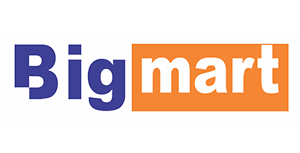

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
training_data = pd.read_csv('bigdatamart_Train.csv')
training_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
testing_data = pd.read_csv('bigdatamart_Test.csv')
testing_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
# As we have different files for training and testing data, let's concatenate them

df = pd.concat([training_data, testing_data], ignore_index=True, sort = False)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
df.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14039,NCN17,11.000,Low Fat,0.055024,Health and Hygiene,100.8358,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
11624,FDU47,12.800,Regular,0.113833,Breads,138.4838,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.52


In [9]:
df.shape

(14204, 12)

<b>Our dataset consists of 14204 rows and 12 columns.</b>

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<b> Our dataset consists of the columns 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'.</b>

<b> The column 'Item_Outlet_Sales' is our target variable.</b>

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<b>The column 'Outlet_Establishment_Year' consists of integer values.      
The columns 'Item_Weight', 'Item_Visibility', 'Item_MRP' and 'Item_Outlet_Sales' consist of floating-point values.      
The columns 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type' and 'Outlet_Type' are of object datatype.</b>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
training_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<b> Now, let's check the unique values present in the columns, with less number of rows</b>

In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [16]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [18]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<b> As we can see the column 'Item_Fat_Content' has an entry, which basically means that the item has low fat content with different names, i.e., 'Low Fat', 'low fat' and 'LF'. So, let's just reorganize this column.</b>

In [21]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Checking for Null Values

In [23]:
training_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

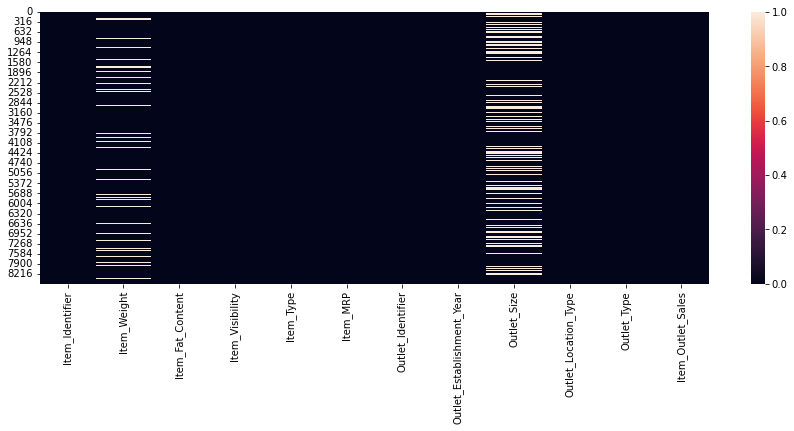

In [24]:
plt.figure(figsize=(15,5))

sns.heatmap(training_data.isnull())

<b>In the heatmap, we can see that null values are present in the columns 'Item_Weight' and 'Outlet_Size'.</b>

# Imputation

<b> Let's impute the missing values present in the column 'Item_Weight'.       
Let's find out the average item weight and fill the missing values with the average value, thus obtained.</b>

In [25]:
#Average weight of the items

items_avg_weight = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
items_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [26]:
missing_weights = df['Item_Weight'].isnull()

#Imputing the values

df.loc[missing_weights, 'Item_Weight'] = df.loc[missing_weights, 'Item_Identifier'].apply(lambda x: items_avg_weight.loc[x])

<b>Let's impute the missing values present in the column 'Outlet_Type'.</b>

In [27]:
from scipy.stats import mode

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

miss_bool = df['Outlet_Size'].isnull() 

df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
0


# Visualization of the Data

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

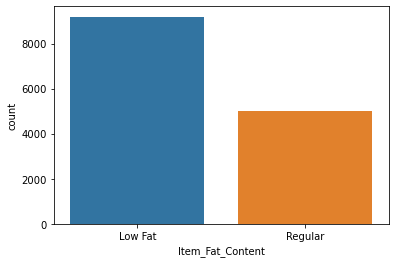

In [28]:
sns.countplot(df['Item_Fat_Content'])

<b> From the graph above, we can conclude that majority of the items have low fat content.</b>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

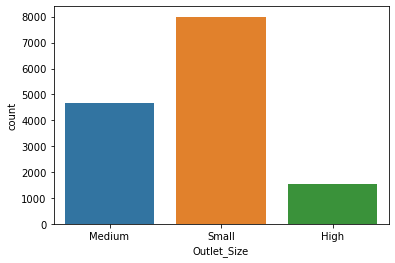

In [29]:
sns.countplot(df['Outlet_Size'])

<b> From the graph above, we can conclude that majority of the outlets are small in size.</b>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

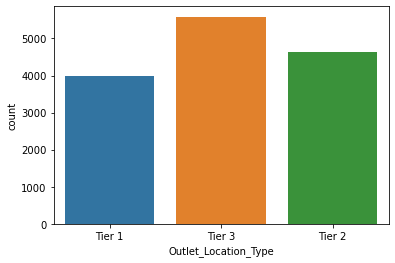

In [30]:
sns.countplot(df['Outlet_Location_Type'])

<b> From the graph above, we can conclude that, majority of the outlets are in Tier 3 cities.</b>

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

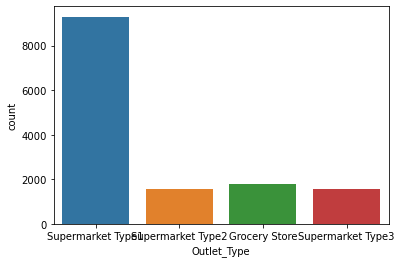

In [31]:
sns.countplot(df['Outlet_Type'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

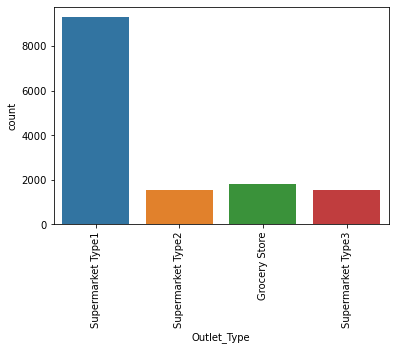

In [32]:
sns.countplot(df['Outlet_Type'])

plt.xticks(rotation=90)

<b> From the graph above, we can conclude that majority of the outlets are of Supermarket Type 1.</b>

In [33]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


<b> The columns 'Item_Identifier' and 'Item_Weight' are not related to our target variable. So, let;s just drop these columns.</b>

In [34]:
df.drop('Item_Identifier', axis=1, inplace=True)

df.drop('Item_Weight', axis=1, inplace=True)

In [35]:
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


<b> Now, let's encode the columns that are of object type.</b>

In [37]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

list1 = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Establishment_Year']
for i in list1:
    df[i] = oe.fit_transform(df[i].values.reshape(-1,1).astype(str))

In [38]:
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.016047,4.0,249.8092,9.0,4.0,1.0,0.0,1.0,3735.1380
1,1.0,0.019278,14.0,48.2692,3.0,8.0,1.0,2.0,2.0,443.4228
2,0.0,0.016760,10.0,141.6180,9.0,4.0,1.0,0.0,1.0,2097.2700
3,1.0,0.000000,6.0,182.0950,0.0,3.0,2.0,2.0,0.0,732.3800
4,0.0,0.000000,9.0,53.8614,1.0,1.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
14199,1.0,0.013496,13.0,141.3154,8.0,2.0,2.0,0.0,1.0,NaN
14200,1.0,0.142991,15.0,169.1448,3.0,8.0,1.0,2.0,2.0,NaN
14201,0.0,0.073529,8.0,118.7440,7.0,5.0,2.0,1.0,1.0,NaN
14202,1.0,0.000000,3.0,214.6218,2.0,7.0,2.0,1.0,1.0,NaN


# Correlation

In [39]:
df.corr()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.044274,-0.147733,-0.004019,-0.001095,0.000142,-0.000138,0.001373,-0.000228,0.018719
Item_Visibility,0.044274,1.000000,-0.035646,-0.006351,-0.106181,-0.091511,0.093146,-0.017362,-0.165726,-0.128625
Item_Type,-0.147733,-0.035646,1.000000,0.043948,0.001126,0.003295,-0.002271,0.002083,0.004305,0.017048
Item_MRP,-0.004019,-0.006351,0.043948,1.000000,-0.000555,0.000302,-0.001052,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001095,-0.106181,0.001126,-0.000555,1.000000,-0.030948,0.260217,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,0.000142,-0.091511,0.003295,0.000302,-0.030948,1.000000,0.292307,0.041889,-0.040255,-0.025525
Outlet_Size,-0.000138,0.093146,-0.002271,-0.001052,0.260217,0.292307,1.000000,-0.480055,-0.401405,-0.162753
Outlet_Location_Type,0.001373,-0.017362,0.002083,0.000838,-0.716151,0.041889,-0.480055,1.000000,0.467251,0.089367
Outlet_Type,-0.000228,-0.165726,0.004305,0.000136,0.099899,-0.040255,-0.401405,0.467251,1.000000,0.401522
Item_Outlet_Sales,0.018719,-0.128625,0.017048,0.567574,0.162325,-0.025525,-0.162753,0.089367,0.401522,1.000000


<AxesSubplot:>

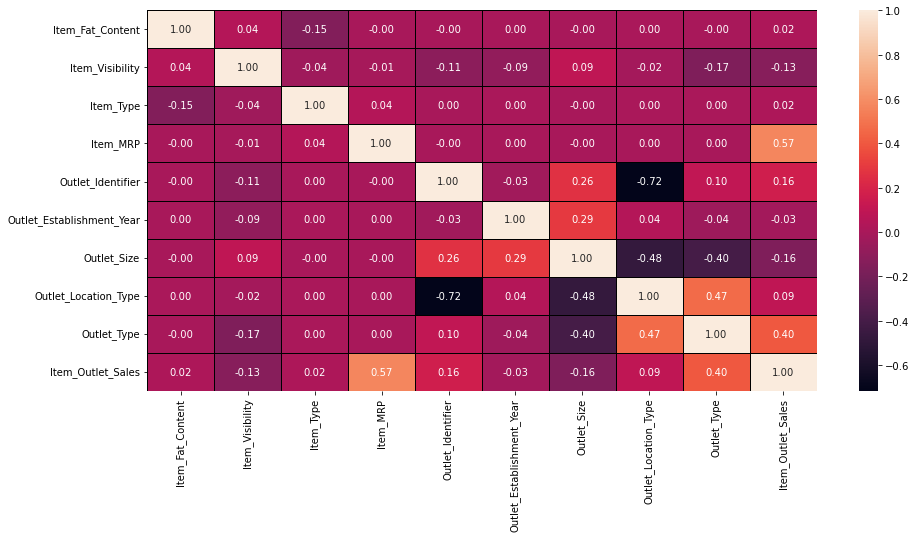

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt = '.2f')

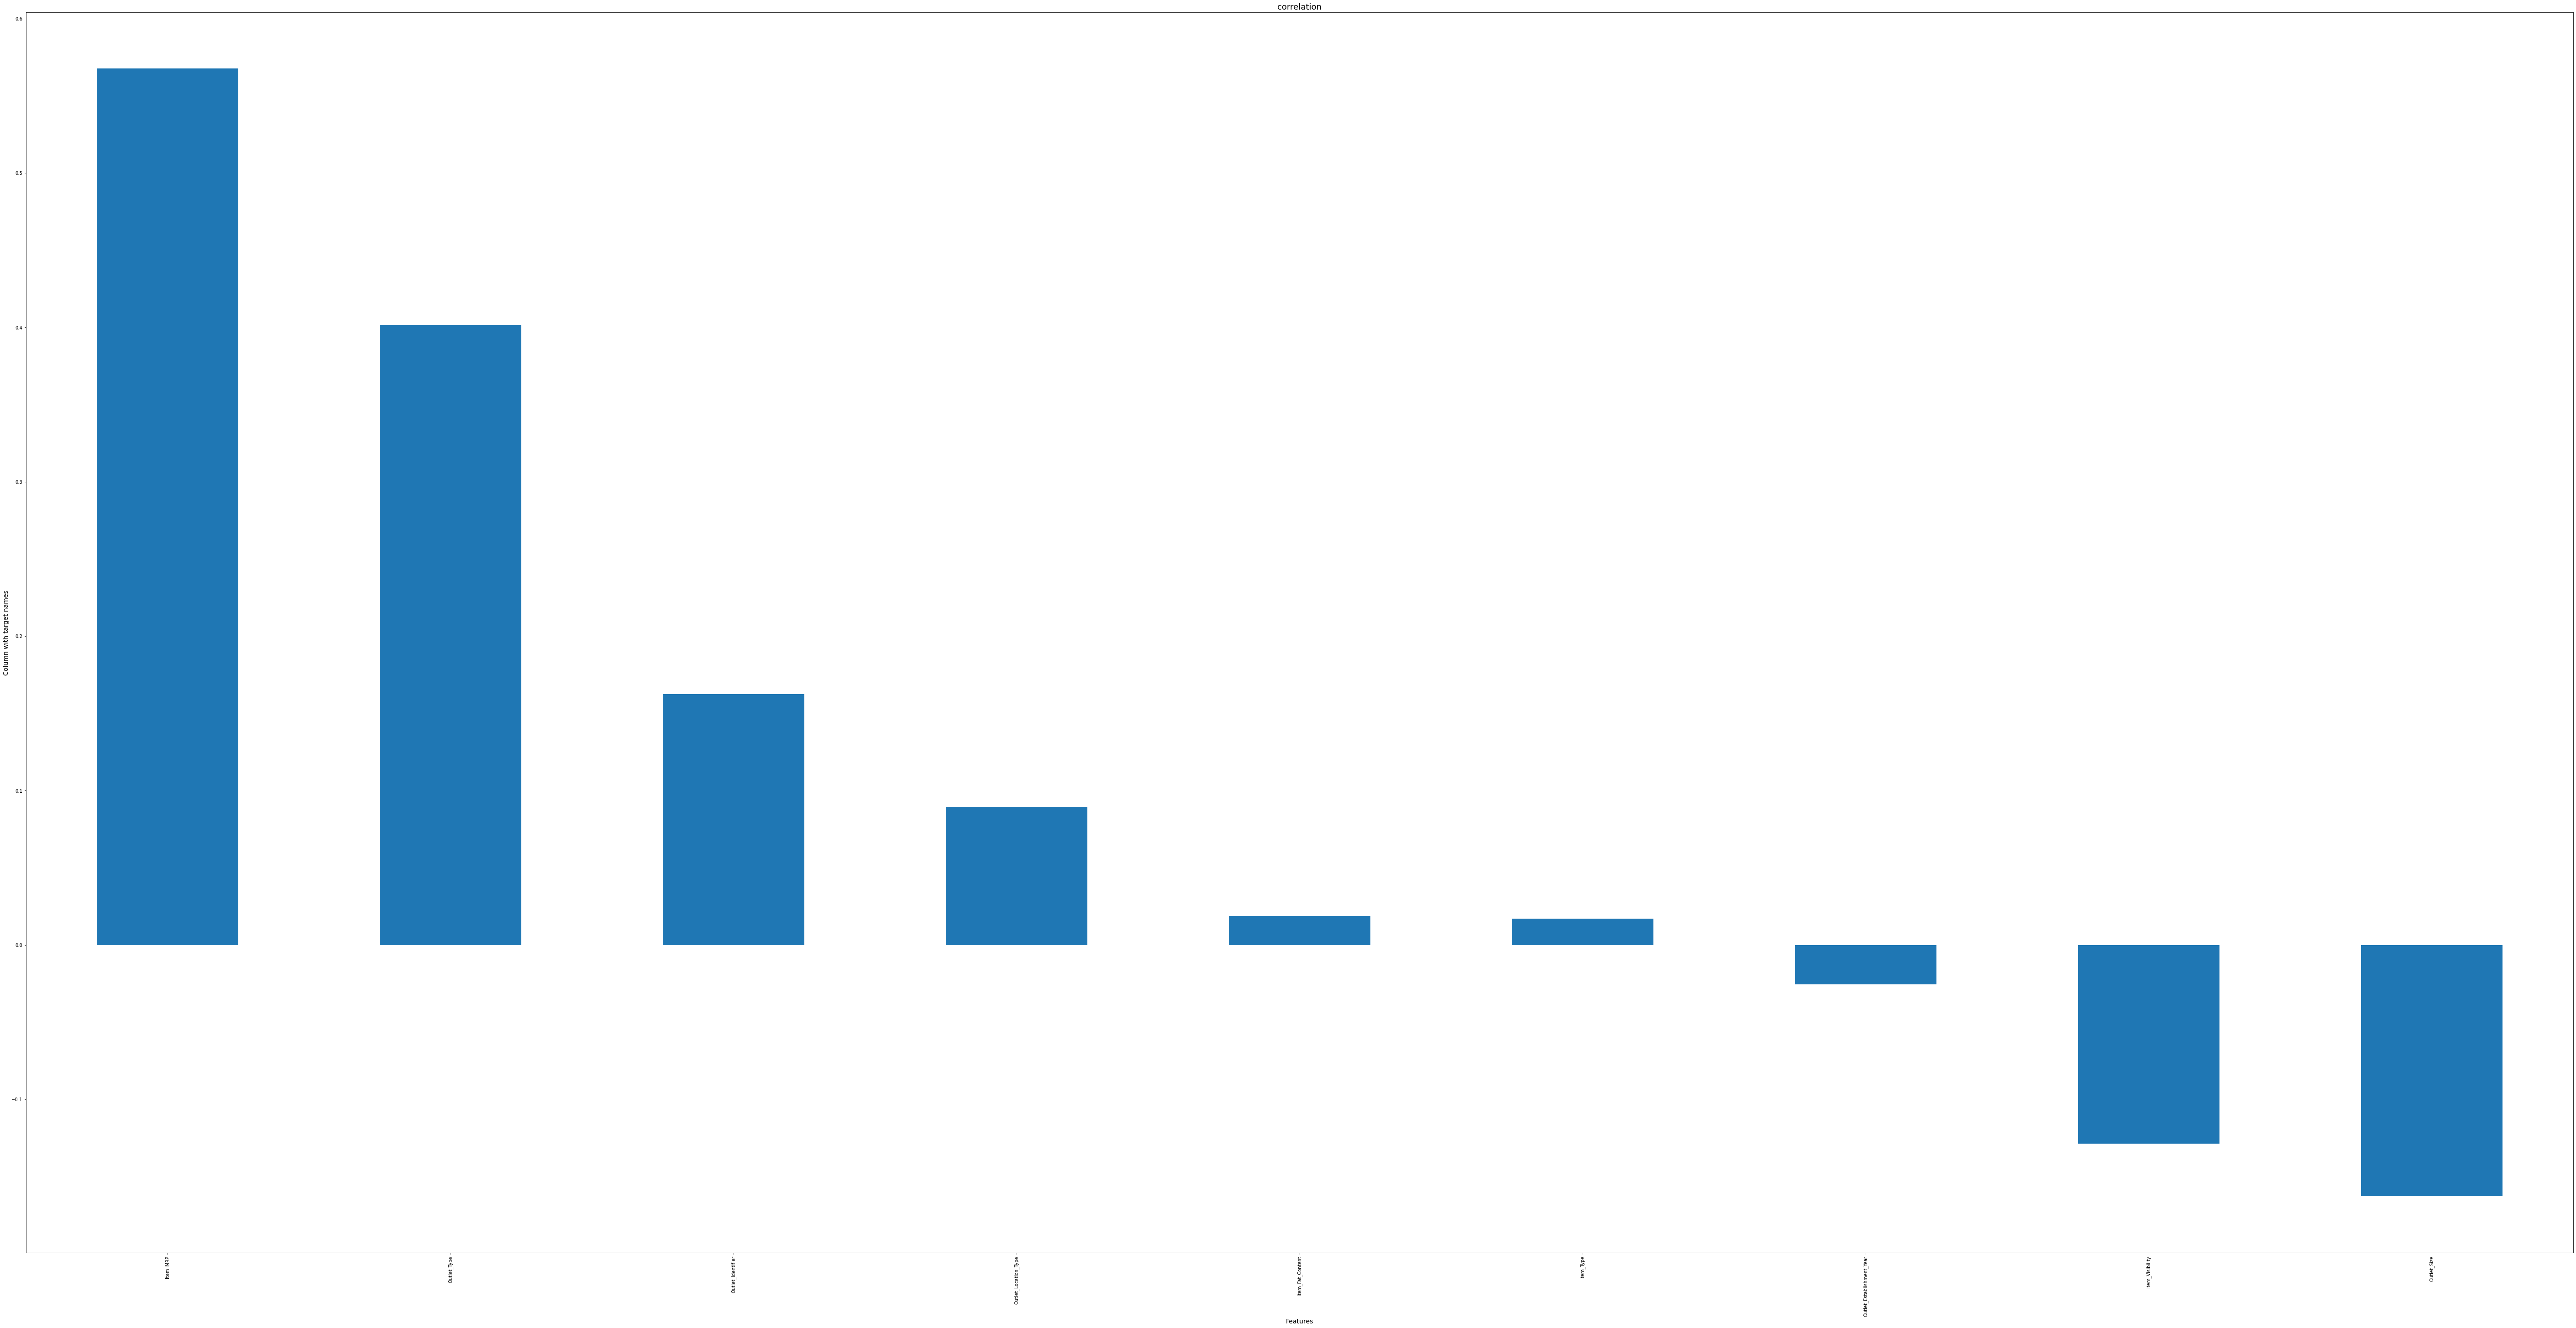

In [41]:
plt.figure(figsize=(100,50))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

<b>The column ''Item_Fat_Content'' has 2% correlation with the target column.      
The column 'Item_Type' has 2% correlation with the target column.        
The column 'Item_MRP' has 57% correlation with the target column.       
The column 'Outlet_Identifier' has 16% correlation with the target column.           
The column 'Outlet_Location_Type' has 9% correlation with the target column.               
The column 'Outlet_Type' has 40% correlation with the target column.</b>

<b>The columns 'Item_Visibility', 'Outlet_Establishment_Year' and 'Outlet_Size' have negative correlation with the target column.</b>

<b>Max. correlation: 'Item_MRP'</b>

In [42]:
df.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.034412
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

array([[<AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_Type'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Identifier'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

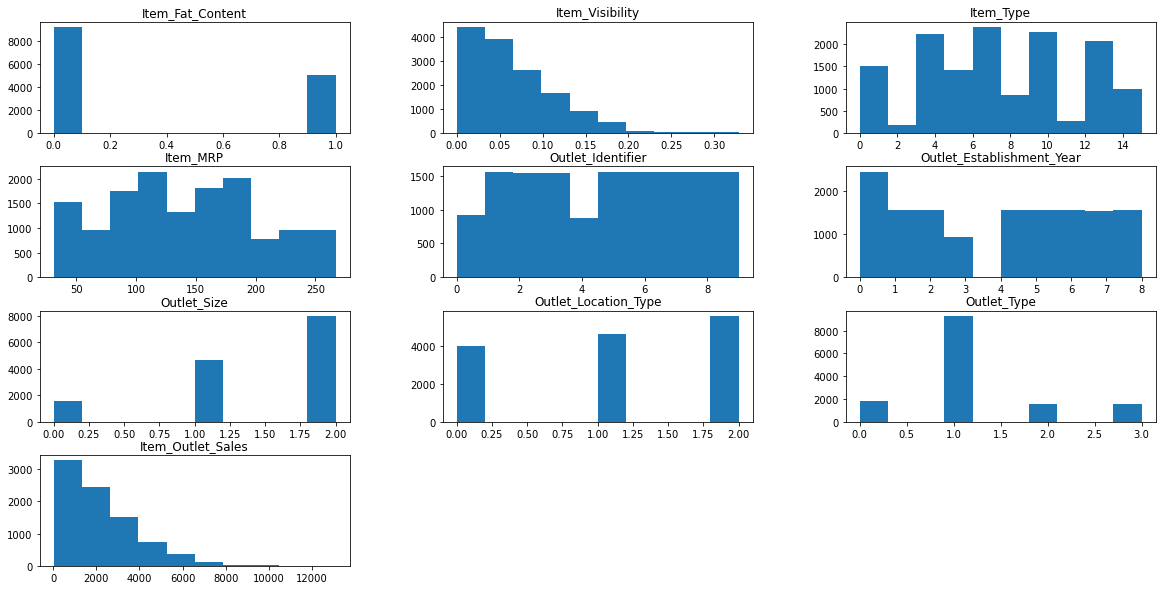

In [43]:
df.hist(figsize=(20,10), grid=False, layout=(4, 3))

# Outlier Detection

<AxesSubplot:>

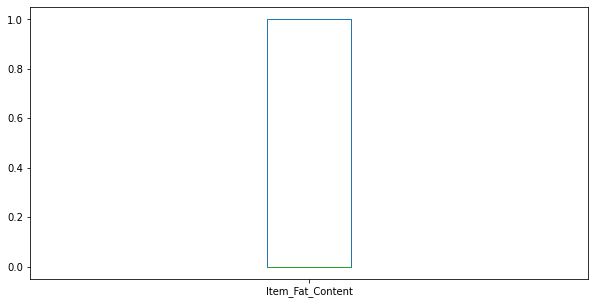

In [44]:
plt.figure(figsize = (10,5))

df['Item_Fat_Content'].plot.box()

<AxesSubplot:>

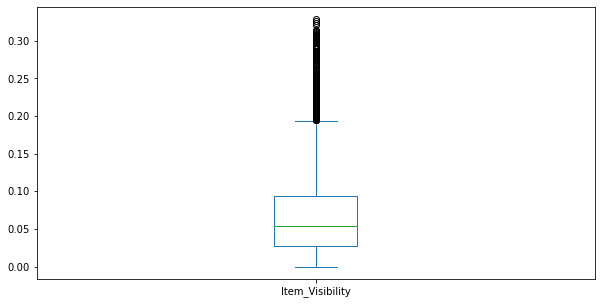

In [45]:
plt.figure(figsize = (10,5))

df['Item_Visibility'].plot.box()

<AxesSubplot:>

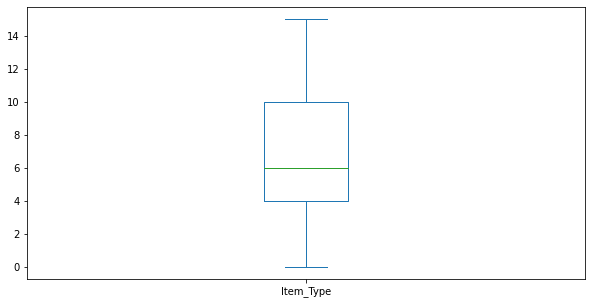

In [46]:
plt.figure(figsize = (10,5))

df['Item_Type'].plot.box()

<AxesSubplot:>

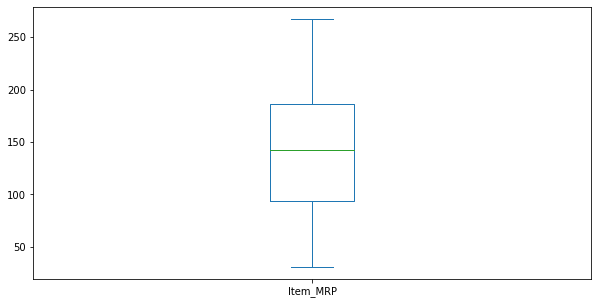

In [47]:
plt.figure(figsize = (10,5))

df['Item_MRP'].plot.box()

<AxesSubplot:>

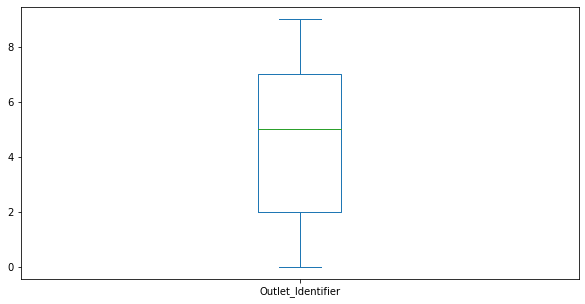

In [48]:
plt.figure(figsize = (10,5))

df['Outlet_Identifier'].plot.box()

<AxesSubplot:>

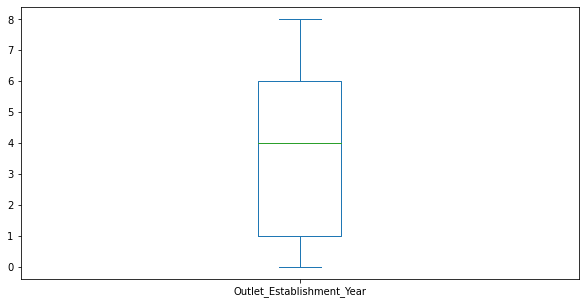

In [49]:
plt.figure(figsize = (10,5))

df['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

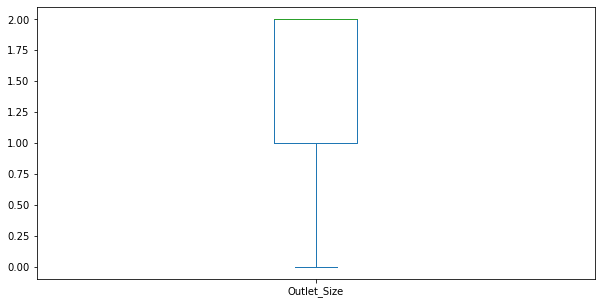

In [50]:
plt.figure(figsize = (10,5))

df['Outlet_Size'].plot.box()

<AxesSubplot:>

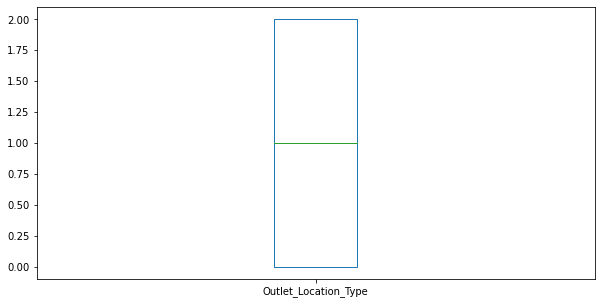

In [51]:
plt.figure(figsize = (10,5))

df['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

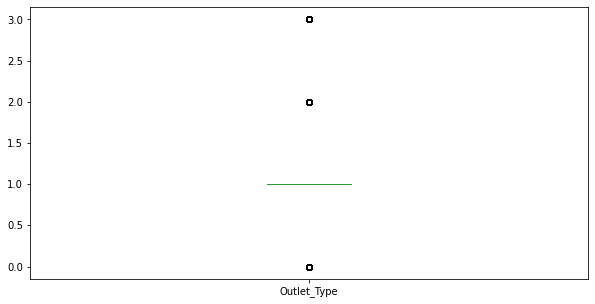

In [52]:
plt.figure(figsize = (10,5))

df['Outlet_Type'].plot.box()

<b> Outliers are present in the columns 'Item_Visibility' and 'Outlet_Type'.</b>

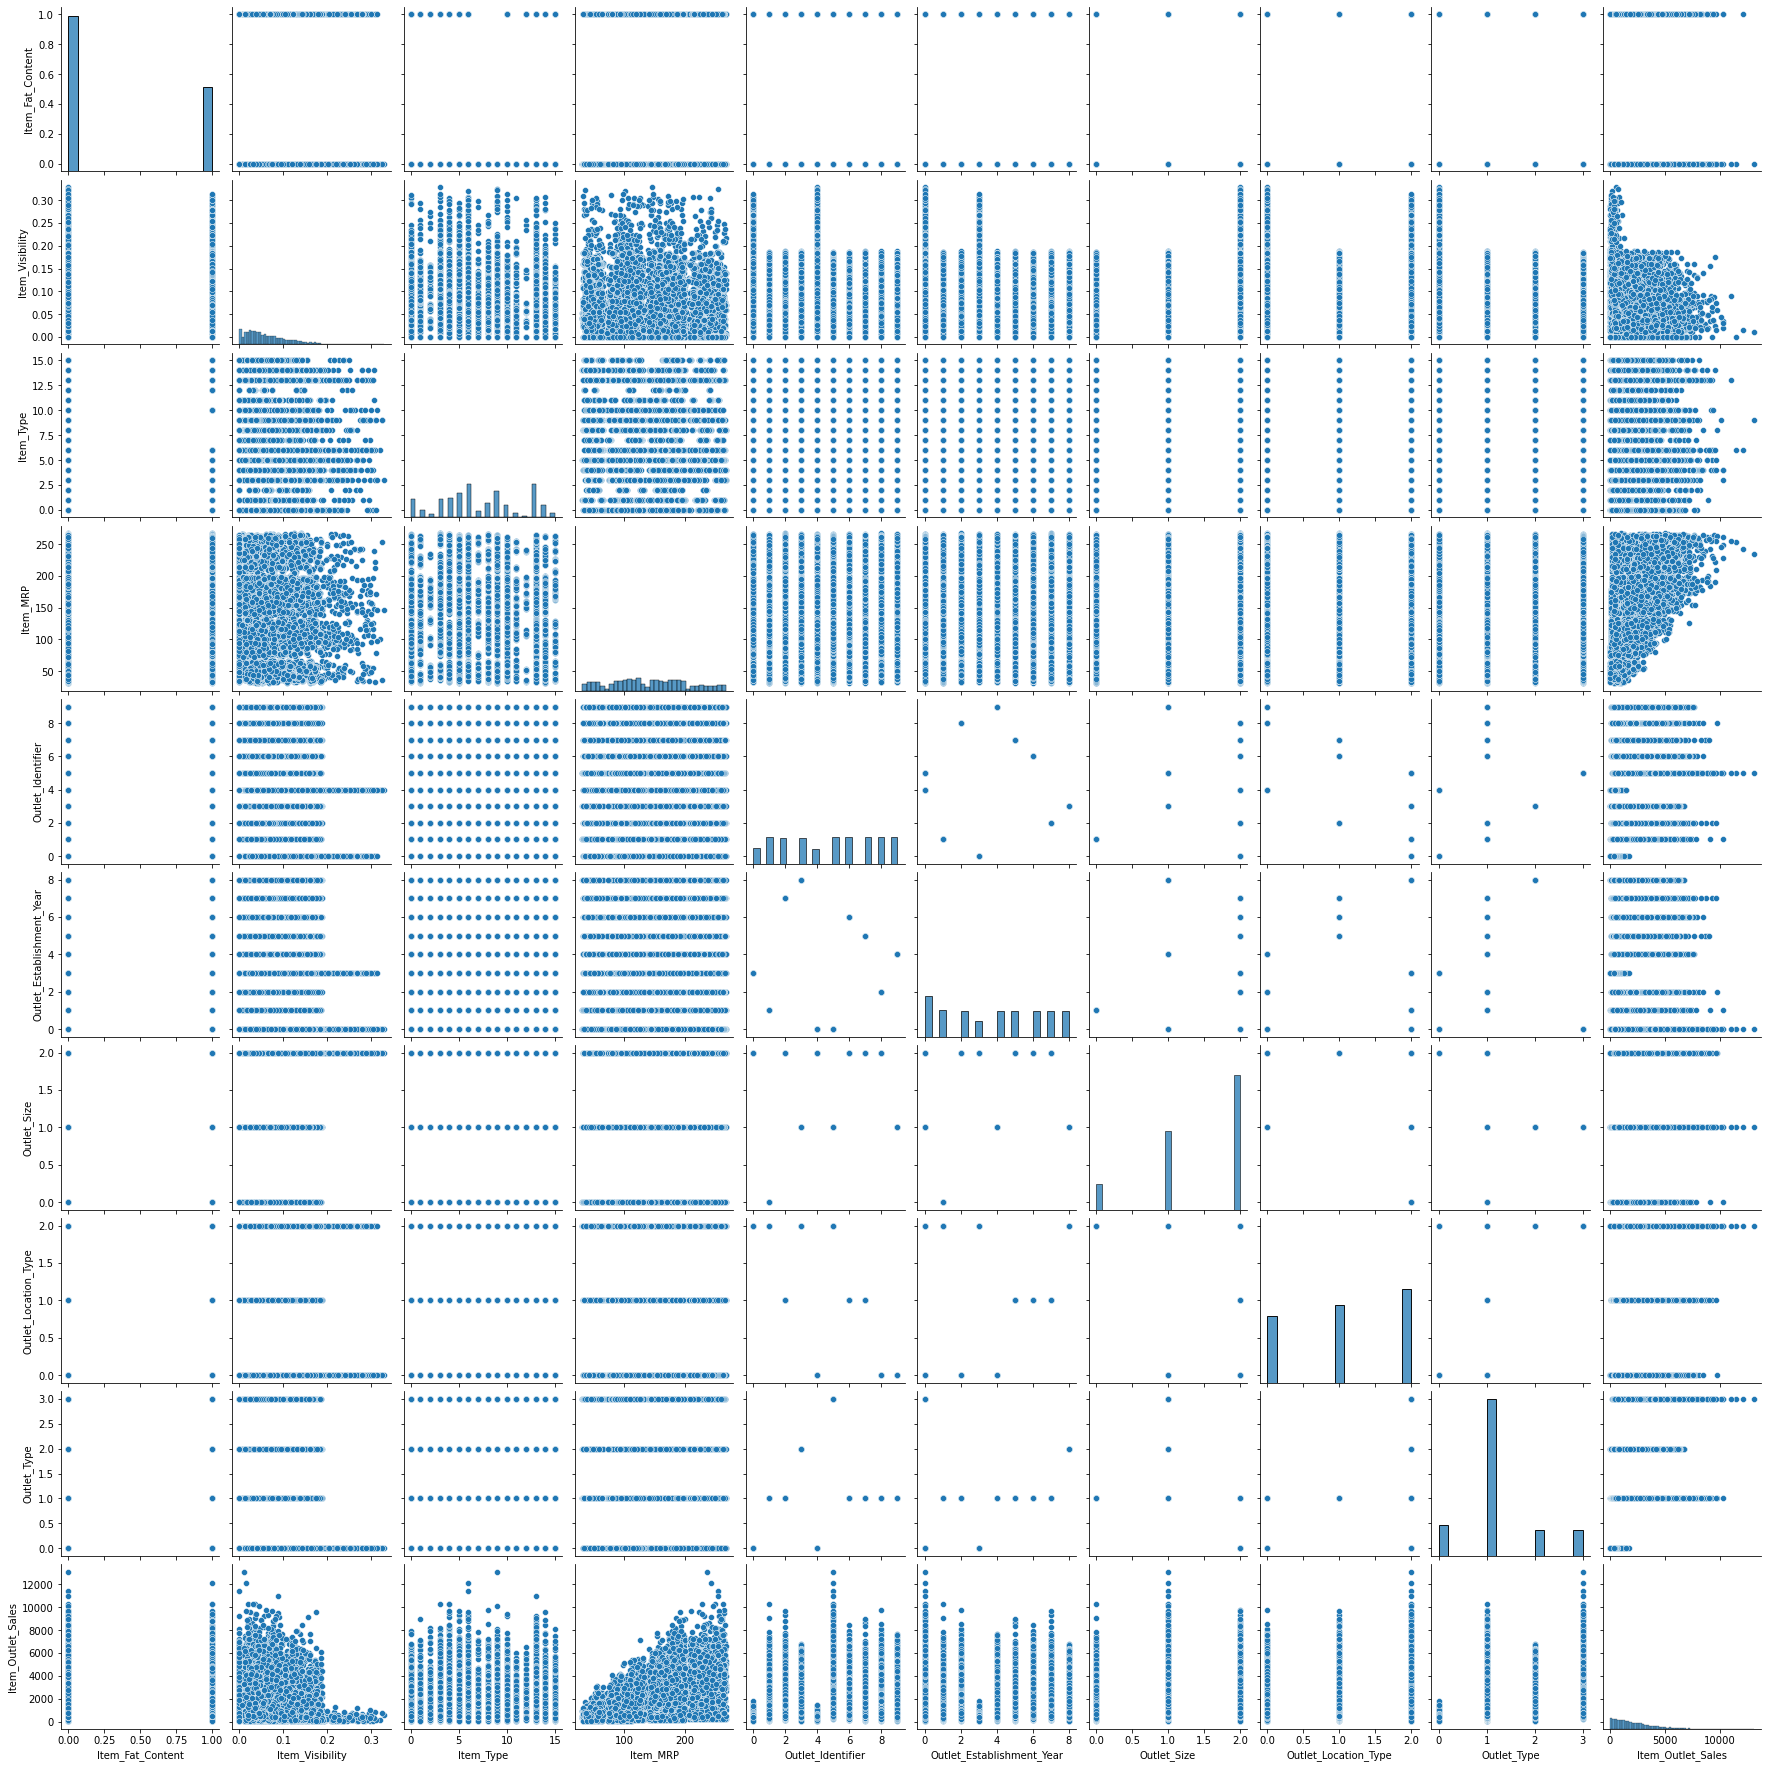

In [53]:
sns.pairplot(df)

In [54]:
df.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.034412
Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
dtype: float64

In [55]:
df.skew().sort_values()

Outlet_Size                 -0.861786
Outlet_Location_Type        -0.209053
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.034412
Item_Type                    0.099574
Item_MRP                     0.130728
Item_Fat_Content             0.613645
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
Item_Visibility              1.195175
dtype: float64

<b> As the skewness is minimal, we will not remove it.</b>

# Checking Multicollinearity With VIF

In [56]:
df.iloc[:,0:-1].columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df.iloc[:,0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df.iloc[:,0:-1].values,i) for i in range(df.iloc[:,0:-1].shape[1])]
    return vif

In [58]:
vif_calc()

,variables,VIF FACTOR
0,Item_Fat_Content,1.553790
1,Item_Visibility,2.644445
2,Item_Type,3.760768
3,Item_MRP,5.510096
4,Outlet_Identifier,9.103896
5,Outlet_Establishment_Year,3.428072
6,Outlet_Size,7.044245
7,Outlet_Location_Type,8.408926
8,Outlet_Type,8.194522


<AxesSubplot:>

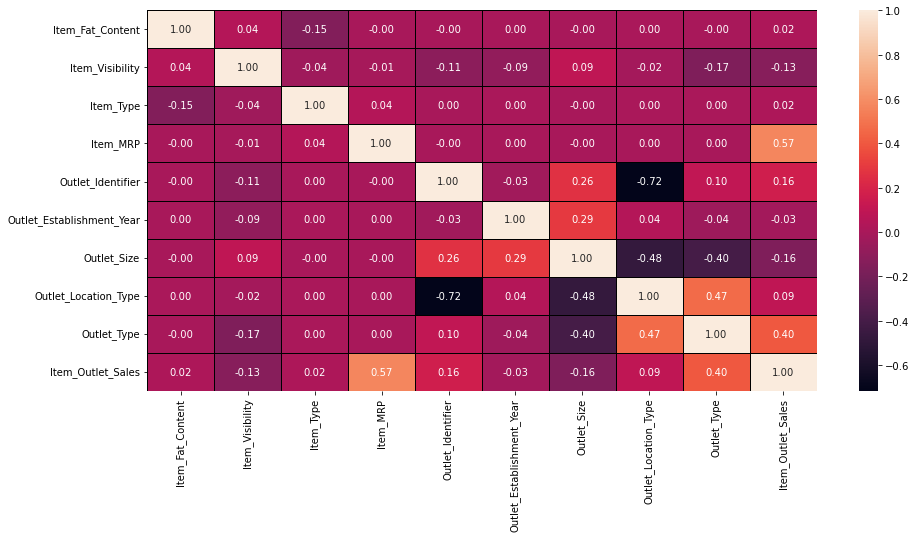

In [59]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt = '.2f')

<b>The column "Outlet_Location_Type" has high negative correlation with the column "Outlet_Identifier". So, let's just drop it.</b>

In [60]:
df.drop('Outlet_Location_Type', axis=1, inplace=True)

In [61]:
vif_calc()

,variables,VIF FACTOR
0,Item_Fat_Content,1.527664
1,Item_Visibility,2.488090
2,Item_Type,3.516386
3,Item_MRP,4.943491
4,Outlet_Identifier,4.294801
5,Outlet_Establishment_Year,3.245505
6,Outlet_Size,6.892837
7,Outlet_Type,3.204460


Item_Fat_Content                 AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Visibility               AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Type                     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_MRP                        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Outlet_Identifier            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Type                  AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Item_Outlet_Sales            AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

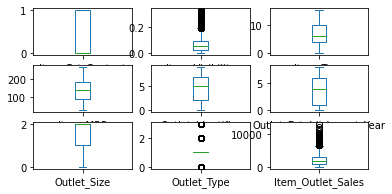

In [62]:
df.plot(kind='box', subplots=True, layout=(4, 3))

<b> As we can see, outliers are present in the columns "Item_Visibility", "Outlet_Type" and "Item_Outlet_Sales".</b>      

<b> Trying to remove the outliers is resulting in the entire rows getting removed. So, let's not remove the outliers, and just proceed further.</b>

<b> As we have already been provided with the training and testing data separately, so let's just split the dataset by specifying the indices.</b>

In [63]:
x = df.iloc[0:8523,0:-1]
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,0.0,0.016047,4.0,249.8092,9.0,4.0,1.0,1.0
1,1.0,0.019278,14.0,48.2692,3.0,8.0,1.0,2.0
2,0.0,0.016760,10.0,141.6180,9.0,4.0,1.0,1.0
3,1.0,0.000000,6.0,182.0950,0.0,3.0,2.0,0.0
4,0.0,0.000000,9.0,53.8614,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8518,0.0,0.056783,13.0,214.5218,1.0,1.0,0.0,1.0
8519,1.0,0.046982,0.0,108.1570,7.0,5.0,2.0,1.0
8520,0.0,0.035186,8.0,85.1224,6.0,6.0,2.0,1.0
8521,1.0,0.145221,13.0,103.1332,3.0,8.0,1.0,2.0


In [64]:
y = df.iloc[0:8523,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Scaling the Data by using StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
x_scaled = SC.fit_transform(x)
x_scaled

array([[-0.73814723, -0.97073217, -0.76647929, ...,  0.07666798,
        -0.66408049, -0.25265831],
       [ 1.35474328, -0.90811123,  1.6089627 , ...,  1.5417828 ,
        -0.66408049,  1.00297245],
       [-0.73814723, -0.95691733,  0.6587859 , ...,  0.07666798,
        -0.66408049, -0.25265831],
       ...,
       [-0.73814723, -0.59978449,  0.1836975 , ...,  0.80922539,
         0.79995418, -0.25265831],
       [ 1.35474328,  1.53287976,  1.3714185 , ...,  1.5417828 ,
        -0.66408049,  1.00297245],
       [-0.73814723, -0.41193591,  1.6089627 , ..., -0.65588943,
         0.79995418, -0.25265831]])

In [66]:
x = pd.DataFrame(x_scaled)
x

,0,1,2,3,4,5,6,7
0,-0.738147,-0.970732,-0.766479,1.747454,1.507813,0.076668,-0.664080,-0.252658
1,1.354743,-0.908111,1.608963,-1.489023,-0.607071,1.541783,-0.664080,1.002972
2,-0.738147,-0.956917,0.658786,0.010040,1.507813,0.076668,-0.664080,-0.252658
3,1.354743,-1.281758,-0.291391,0.660050,-1.664513,-0.289611,0.799954,-1.508289
4,-0.738147,-1.281758,0.421242,-1.399220,-1.312032,-1.022168,-2.128115,-0.252658
...,...,...,...,...,...,...,...,...
8518,-0.738147,-0.181193,1.371418,1.180783,-1.312032,-1.022168,-2.128115,-0.252658
8519,1.354743,-0.371154,-1.716656,-0.527301,0.802852,0.442947,0.799954,-0.252658
8520,-0.738147,-0.599784,0.183698,-0.897208,0.450371,0.809225,0.799954,-0.252658
8521,1.354743,1.532880,1.371418,-0.607977,-0.607071,1.541783,-0.664080,1.002972


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfg = RandomForestRegressor()

In [69]:
models = [lr, ridge, lasso, en, knr, svr, dtr, rfg]

best_random_state = 0

lowest_error = 1436190

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=i)
    lr.fit(xtrain, ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 1442496.0766098066
At random score 1, mean squared error is 1481322.8269839743
At random score 2, mean squared error is 1576919.5729032317
At random score 3, mean squared error is 1378961.646369047
At random score 4, mean squared error is 1386799.5555137936
At random score 5, mean squared error is 1481247.3095696329
At random score 6, mean squared error is 1455380.4850643454
At random score 7, mean squared error is 1577418.3523520865
At random score 8, mean squared error is 1540564.0098248692
At random score 9, mean squared error is 1443953.905902573
At random score 10, mean squared error is 1441103.3645300835
At random score 11, mean squared error is 1534597.7002088546
At random score 12, mean squared error is 1425576.1330913042
At random score 13, mean squared error is 1450458.6351119154
At random score 14, mean squared error is 1444437.124295176
At random score 15, mean squared error is 1564960.0487708873
At random score 16, mean squared erro

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=42)

In [71]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 49.69265303262464% and a mean squared error of 1306084.26
Model Ridge() had training score of 49.69270594579889% and a mean squared error of 1306087.56
Model Lasso() had training score of 49.6947216394955% and a mean squared error of 1305834.73
Model ElasticNet() had training score of 44.68066272123301% and a mean squared error of 1455605.55
Model KNeighborsRegressor() had training score of 51.4025429854515% and a mean squared error of 1211768.59
Model SVR() had training score of 4.91874996064428% and a mean squared error of 2443376.64
Model DecisionTreeRegressor() had training score of 20.017945514630046% and a mean squared error of 2127189.29
Model RandomForestRegressor() had training score of 55.21309878488394% and a mean squared error of 1177762.36


<b>We can see that the best model is "Random Forest Regressor".</b>

In [72]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [73]:
grid = GridSearchCV(rfg, parameters, cv=5, n_jobs=-1)

In [ ]:
grid.fit(xtrain, ytrain)

grid.best_params_

In [ ]:
rfg = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=2, min_samples_split=4, n_estimators=500)

In [ ]:
cross_val_score(rfg, xtrain,ytrain, cv=5)

In [ ]:
rfg.fit(xtrain, ytrain)
pred = rf.predict(xtest)

print(f'The cross validation score is: {(cross_val_score(rf, xtrain, ytrain,cv=5).mean())*100}')
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')
print(f'The r2 score is {r2_score(ytest, pred)}')

# Saving the model

In [ ]:
import pickle
filename = 'bigdatamart.pkl'
pickle.dump(rfg, open(filename, 'wb'))